In [110]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
import warnings
warnings.filterwarnings('ignore')

### Problem Statement

### Data Gathering

In [112]:
df=pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Data Cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [25]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [26]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot: >

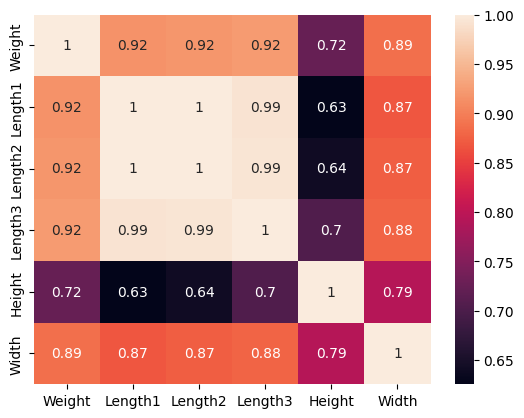

In [27]:
sns.heatmap(df.corr(),annot=True)

### 1. species

In [28]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [29]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<BarContainer object of 7 artists>

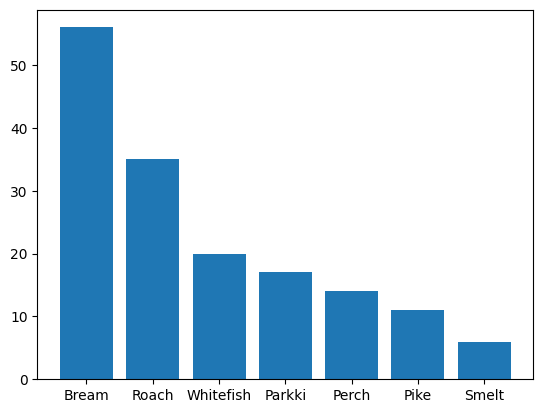

In [30]:
plt.bar(df['Species'].unique(),df['Species'].value_counts())

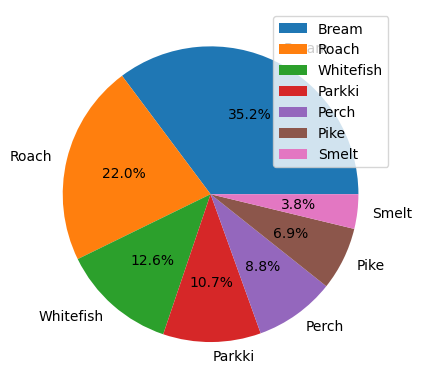

In [32]:
plt.pie(df['Species'].value_counts(),labels=df['Species'].unique() , autopct='%1.1f%%')
plt.legend()
plt.show()

In [33]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

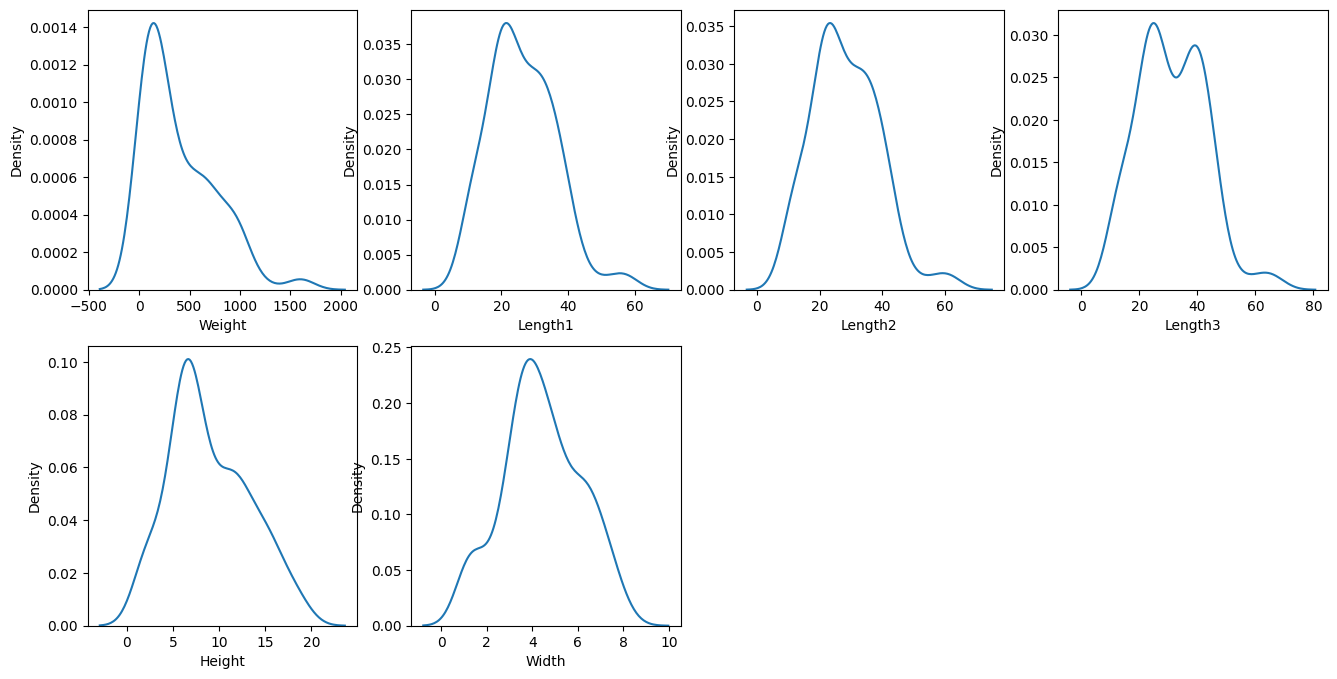

In [34]:
i=1
plt.figure(figsize=(16,8))
for col in df.iloc[:,1:].columns:
    plt.subplot(2,4,i)
    sns.kdeplot(df[col])
    i+=1

### Checking Outliers

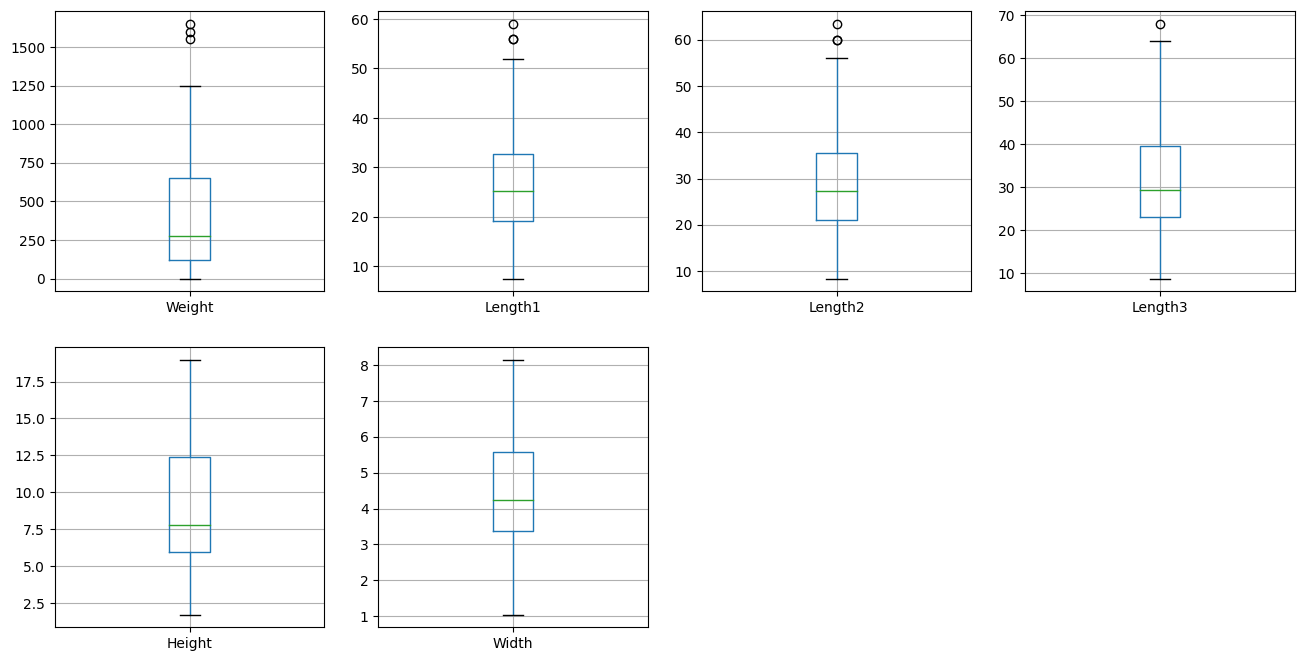

In [35]:
i=1
plt.figure(figsize=(16,8))
for col in df.iloc[:,1:].columns:
    plt.subplot(2,4,i)
    df[[col]].boxplot()
    i+=1

In [36]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [37]:
# One hot encoding
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [38]:
df=pd.get_dummies(df,columns=['Species'])

In [39]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [40]:
x=df.drop('Weight',axis=1)
y=df['Weight']

In [42]:
x.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [43]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

### Train the Model

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [48]:
model=LinearRegression()

In [49]:
model

LinearRegression()

In [50]:
model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation on test data

In [52]:
y_pred=model.predict(x_test)

In [53]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
R2_Score=r2_score(y_test,y_pred)

print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"R2_Score:{R2_Score}")

MAE:74.77259827328962
MSE:9570.088065757687
R2_Score:0.892861498823194


### Model Evaluation on train data

In [54]:
y_pred_train=model.predict(x_train)

In [55]:
MAE=mean_absolute_error(y_train,y_pred_train)
MSE=mean_squared_error(y_train,y_pred_train)
R2_Score=r2_score(y_train,y_pred_train)

print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"R2_Score:{R2_Score}")

MAE:66.59868122685941
MSE:7954.815070193922
R2_Score:0.9425192207503273


### Model is Overfitting

In [57]:
import pickle

In [62]:
with open("Fish_model.pickle", "wb") as file:
    pickle.dump(model,file)

In [61]:
d=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
d

,y_test,y_pred
111,840.0,634.053330
98,188.0,256.816922
122,820.0,885.624256
96,225.0,230.934304
48,169.0,278.002373
114,700.0,740.685320
74,40.0,-153.739501
38,87.0,73.049833
86,120.0,170.074277
157,19.7,120.125880


In [66]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [80]:
test_array=np.zeros(len(x.columns))

In [81]:
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
test_series=pd.Series(test_array,index=x.columns)
test_series

Length1              0.0
Length2              0.0
Length3              0.0
Height               0.0
Width                0.0
Species_Bream        0.0
Species_Parkki       0.0
Species_Perch        0.0
Species_Pike         0.0
Species_Roach        0.0
Species_Smelt        0.0
Species_Whitefish    0.0
dtype: float64

In [83]:
project_data={"columns":list(x.columns)}

In [84]:
project_data

{'columns': ['Length1',
  'Length2',
  'Length3',
  'Height',
  'Width',
  'Species_Bream',
  'Species_Parkki',
  'Species_Perch',
  'Species_Pike',
  'Species_Roach',
  'Species_Smelt',
  'Species_Whitefish']}

In [85]:
length1=23.2
length2=25.4
length3=30
height=11.52
width=4.02
species='Bream'

In [86]:
test_array[0]=length1
test_array[1]=length2
test_array[2]=length3
test_array[3]=height
test_array[4]=width

In [87]:
test_array

array([23.2 , 25.4 , 30.  , 11.52,  4.02,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ])

In [92]:
species='Bream'
species='Species_'+species
species

'Species_Bream'

In [93]:
test_series

Length1              23.20
Length2              25.40
Length3              30.00
Height               11.52
Width                 4.02
Species_Bream         0.00
Species_Parkki        0.00
Species_Perch         0.00
Species_Pike          0.00
Species_Roach         0.00
Species_Smelt         0.00
Species_Whitefish     0.00
dtype: float64

In [94]:
test_series[species]

0.0

In [95]:
test_series[species]=1

In [96]:
test_series

Length1              23.20
Length2              25.40
Length3              30.00
Height               11.52
Width                 4.02
Species_Bream         1.00
Species_Parkki        0.00
Species_Perch         0.00
Species_Pike          0.00
Species_Roach         0.00
Species_Smelt         0.00
Species_Whitefish     0.00
dtype: float64

In [99]:
weight=model.predict([test_series])[0]
print(f"Weight of fish is:{weight:.2f}")

Weight of fish is:291.90


In [105]:
import json

In [106]:
with open("project_data_file.json",'w') as file:
    json.dump(project_data,file)

In [103]:
test_series_2=pd.Series(np.zeros(len(project_data['columns'])),index=project_data['columns'])

In [104]:
test_series_2

Length1              0.0
Length2              0.0
Length3              0.0
Height               0.0
Width                0.0
Species_Bream        0.0
Species_Parkki       0.0
Species_Perch        0.0
Species_Pike         0.0
Species_Roach        0.0
Species_Smelt        0.0
Species_Whitefish    0.0
dtype: float64

In [ ]:
Species	Weight	Length1	Length2	Length3	Height	Width

In [ ]:
    Bream	242.0	23.2	25.4	30.0	11.5200	4.0200
1	Bream	290.0	24.0	26.3	31.2	12.4800	4.3056
2	Bream	340.0	23.9	26.5	31.1	12.3778	4.6961
3	Bream	363.0	26.3	29.0	33.5	12.7300	4.4555
4	Bream	430.0	26.5	29.0	34.0	12.4440	5.1340